In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

"Imported successfully"

'Imported successfully'

In [6]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
data_frame= pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")

In [7]:
data_frame.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [8]:
# Checking for missing values
data_frame.isnull().sum()

area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
class          0
dtype: int64

# Visualized Data

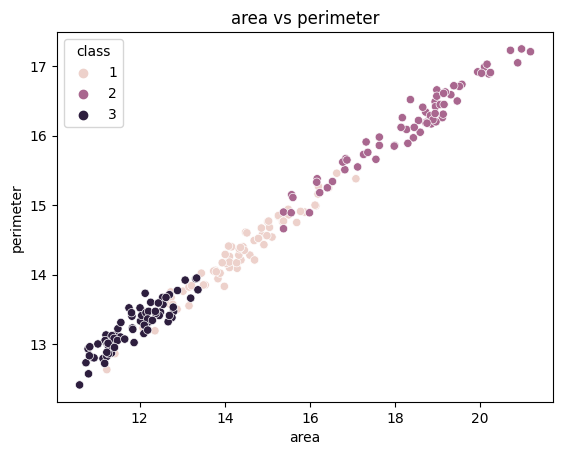

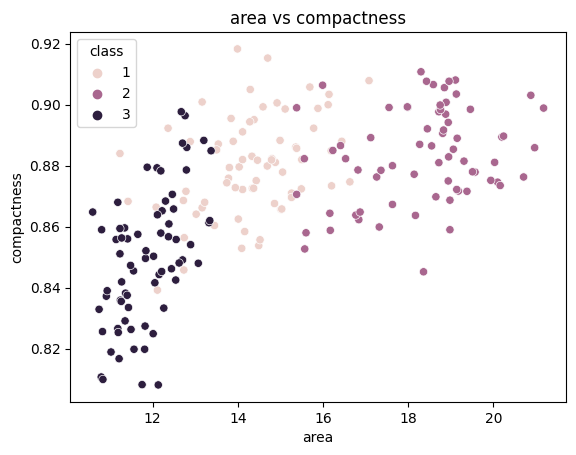

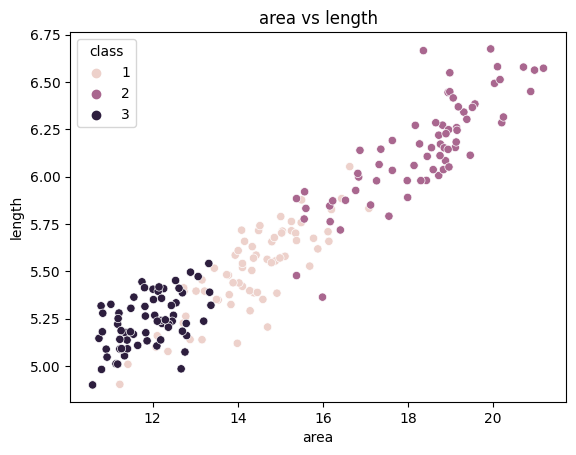

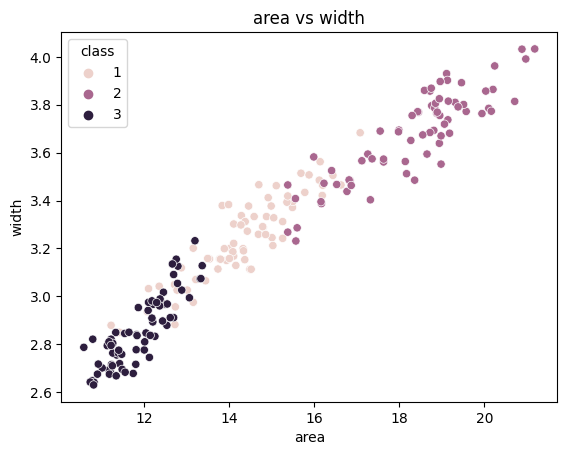

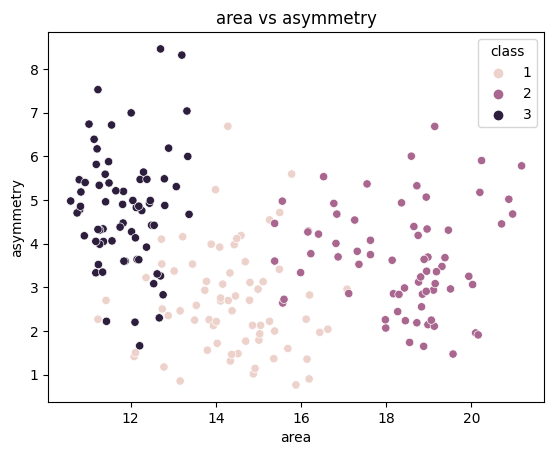

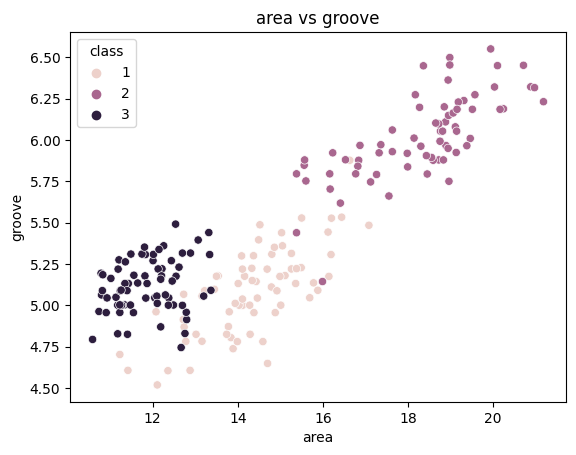

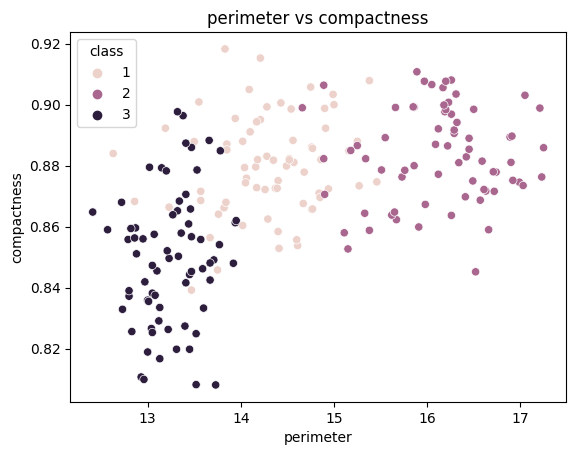

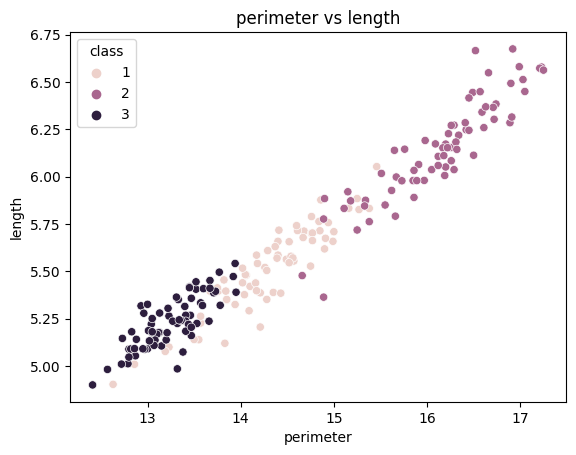

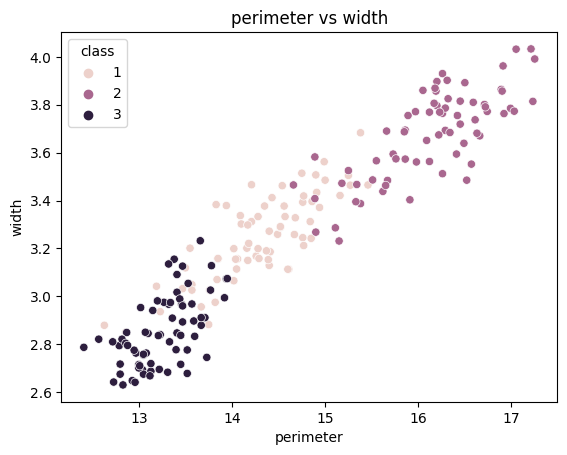

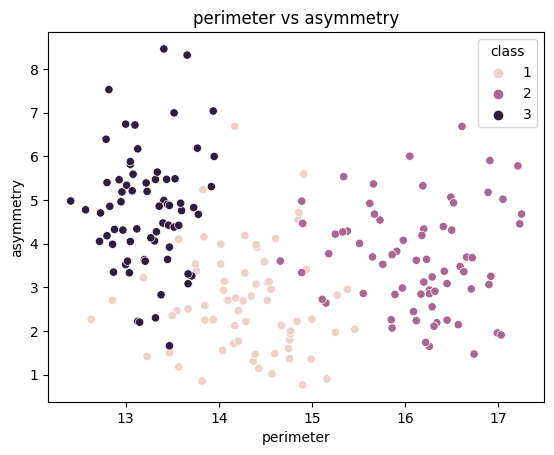

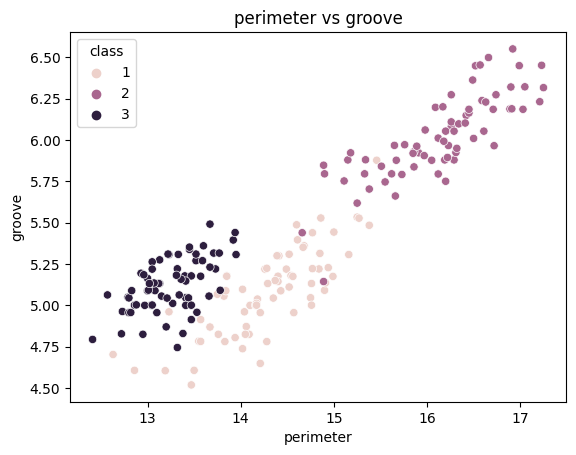

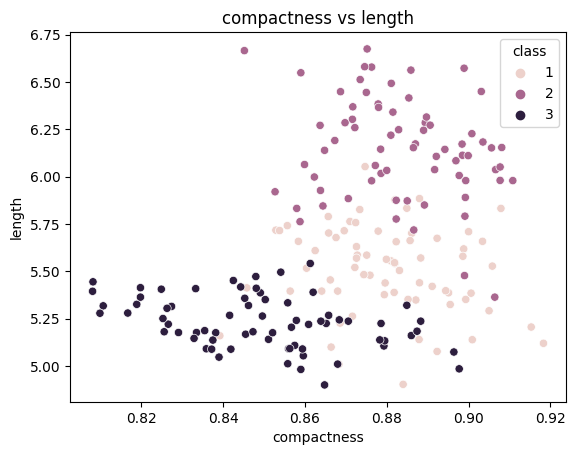

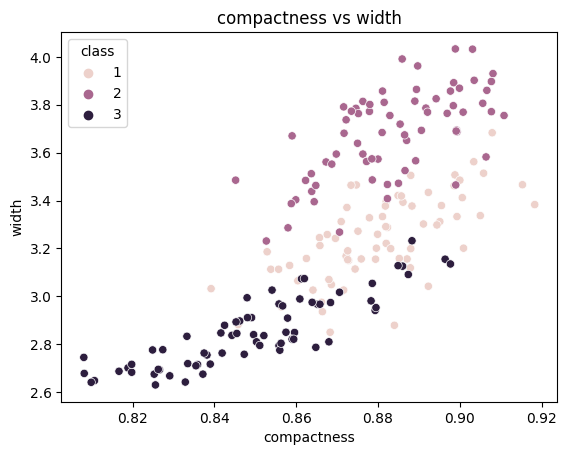

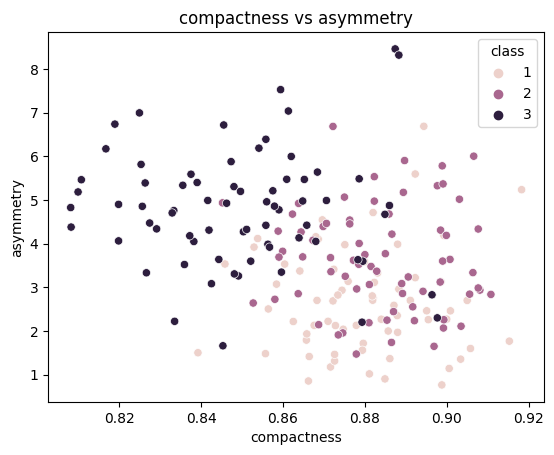

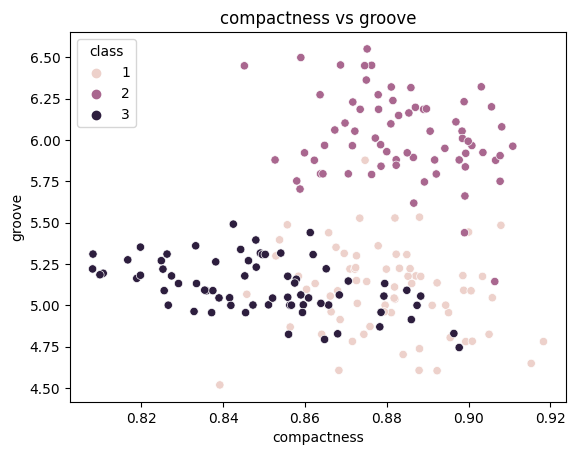

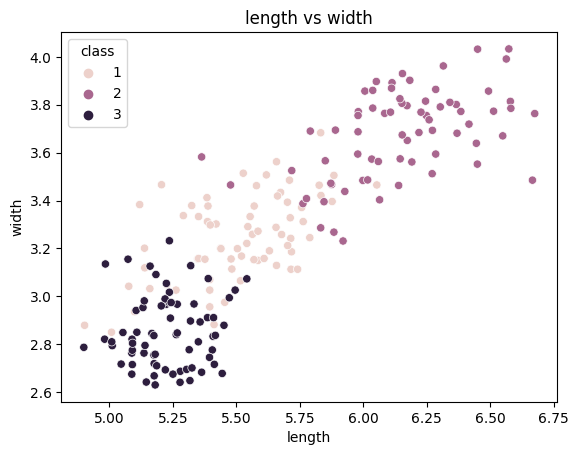

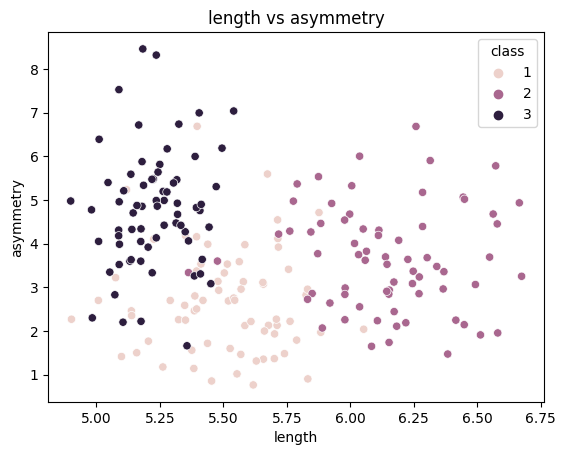

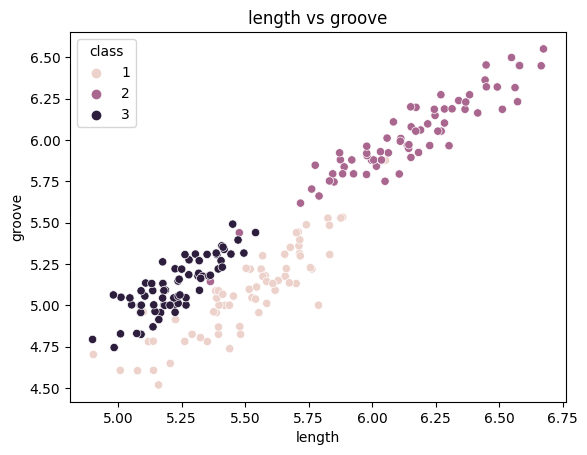

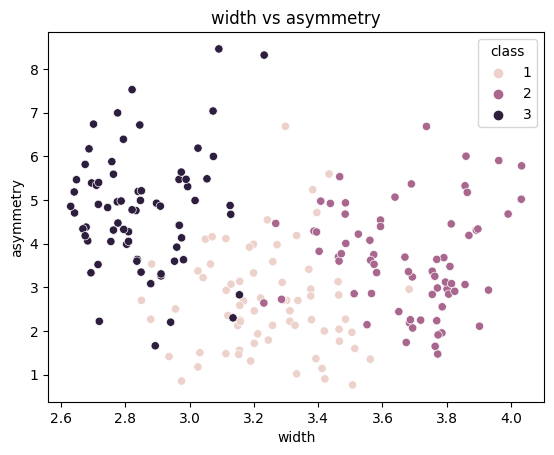

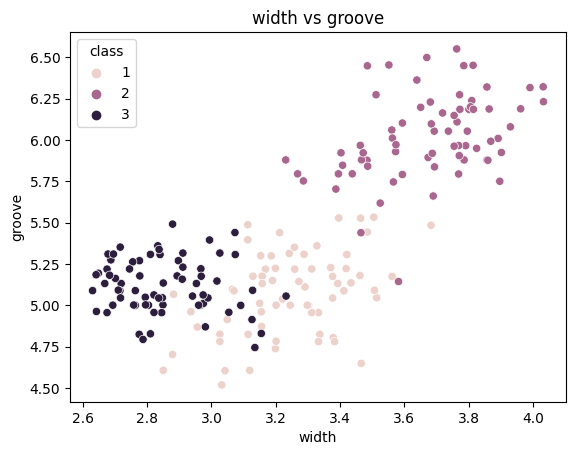

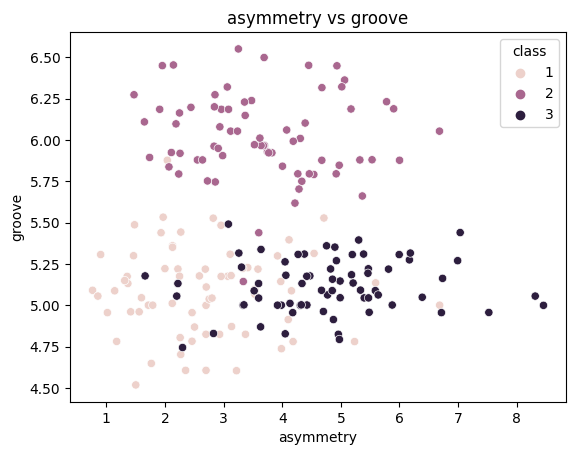

In [9]:
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, data=data_frame, hue="class")
        plt.title(f"{x_label} vs {y_label}")
        plt.show()
        

# Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
x = "compactness"
y = "asymmetry"
X = data_frame[[x, y]].values

In [12]:
k_means = KMeans(n_clusters=3).fit(X)

In [13]:
clusters = k_means.labels_
clusters

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2,
       0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0])

In [14]:
clusters_data_frame = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])

<Axes: xlabel='compactness', ylabel='asymmetry'>

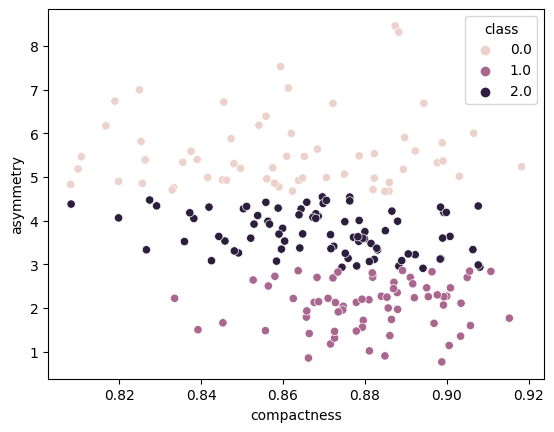

In [15]:
# K means clustering

sns.scatterplot(x=x , y=y, data=clusters_data_frame, hue="class")

<Axes: xlabel='compactness', ylabel='asymmetry'>

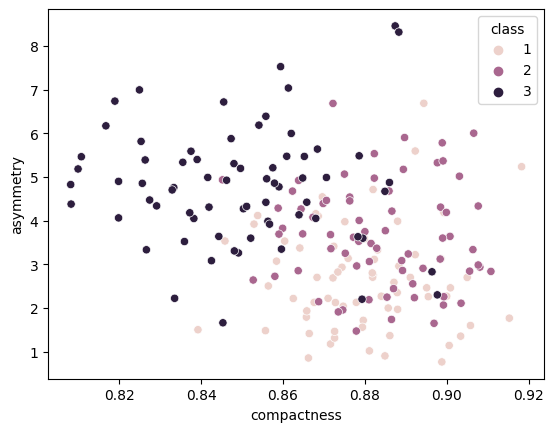

In [16]:
# Original data
sns.scatterplot(x=x , y=y, data=data_frame, hue="class")


# Higher Dimensional Data

In [17]:
X = data_frame[cols[:-1]].values

In [19]:
kmeans = KMeans(n_clusters = 3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, kmeans.labels_.reshape(-1, 1))), columns=data_frame.columns)


[]

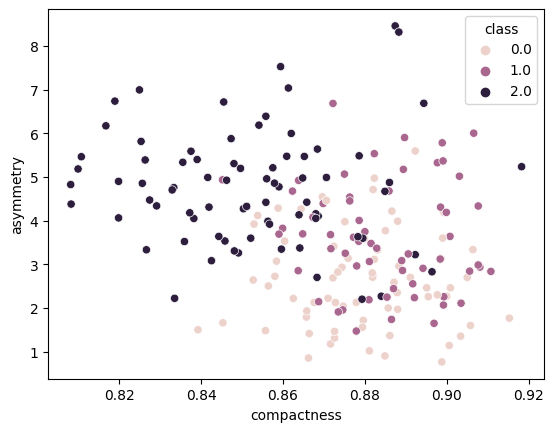

In [20]:
# K Means classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.plot()

[]

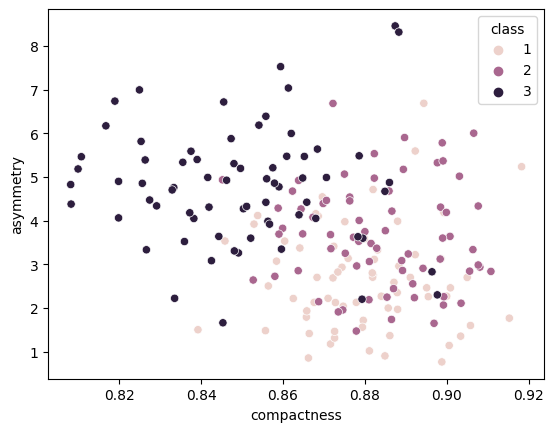

In [21]:
# Original classes
sns.scatterplot(x=x, y=y, hue='class', data=data_frame)
plt.plot()

# PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
transform_pca_x = pca.fit_transform(X)

In [24]:
X.shape, transform_pca_x.shape

((210, 7), (210, 2))

In [25]:
transform_pca_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

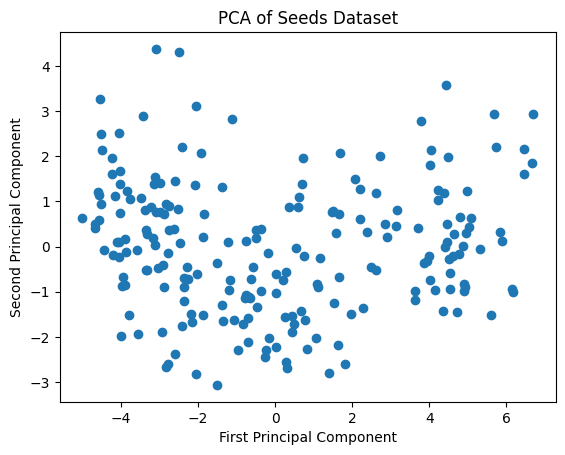

In [26]:
# visualizing the data
plt.scatter(transform_pca_x[:,0], transform_pca_x[:,1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Seeds Dataset")
plt.show()


In [27]:
k_means_pca_data_frame = pd.DataFrame(np.hstack((transform_pca_x, k_means.labels_.reshape(-1, 1))), columns=["PCA1", "PCA2", "class"])

In [28]:
truth_pca_data_frame = pd.DataFrame(np.hstack((transform_pca_x, data_frame["class"].values.reshape(-1, 1))), columns=["pca1", "pca2", "class"])

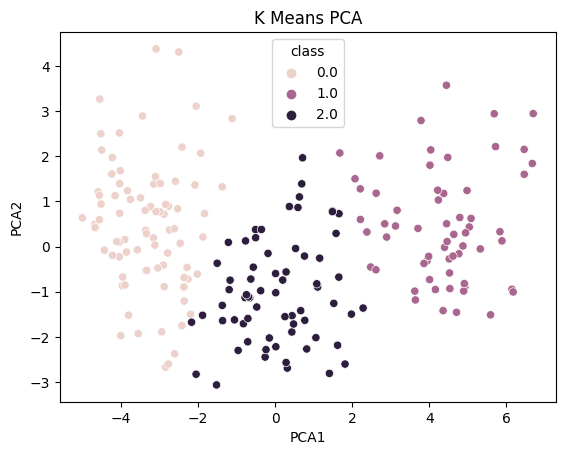

In [29]:
# K means classes
sns.scatterplot(x="PCA1", y="PCA2", hue="class", data=k_means_pca_data_frame)
plt.title("K Means PCA")
plt.show()


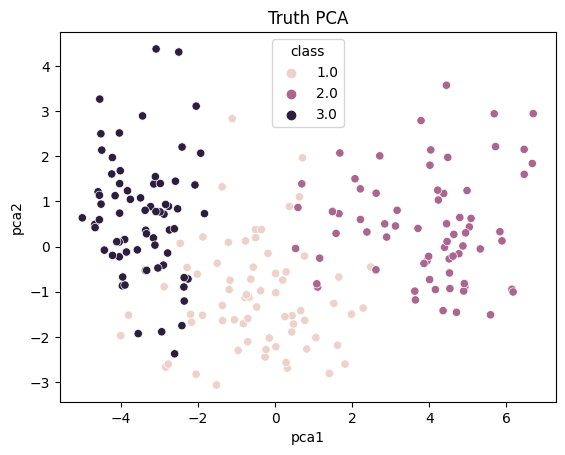

In [30]:
# Truth classes
sns.scatterplot(x="pca1", y="pca2", hue="class", data=truth_pca_data_frame)
plt.title("Truth PCA")
plt.show()